In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d

In [6]:
df = pd.read_csv('deltas.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15488 entries, 0 to 15487
Data columns (total 12 columns):
Unnamed: 0    15488 non-null int64
Layout        15488 non-null int64
Wing          15488 non-null int64
Span          15488 non-null float64
dV            15488 non-null int64
AoA           15488 non-null float64
Cx            15488 non-null float64
Cy            15488 non-null float64
Mz            15488 non-null float64
dCx           15488 non-null float64
dCy           15488 non-null float64
dMz           15488 non-null float64
dtypes: float64(8), int64(4)
memory usage: 1.4 MB


In [8]:
df.head()

,Unnamed: 0,Layout,Wing,Span,dV,AoA,Cx,Cy,Mz,dCx,dCy,dMz
0,0,1,0,0.25,-10,12.0,0.077043,1.15350,-0.108490,-0.005552,-0.03770,-0.114570
1,1,1,0,0.25,-10,10.0,0.057963,1.00160,-0.031581,-0.005253,-0.04191,-0.124639
2,2,1,0,0.25,-10,9.0,0.049605,0.92454,0.004812,-0.005059,-0.04403,-0.129522
3,3,1,0,0.25,-10,8.0,0.042059,0.84677,0.039769,-0.004838,-0.04611,-0.134302
4,4,1,0,0.25,-10,7.0,0.035338,0.76841,0.073244,-0.004587,-0.04817,-0.138960


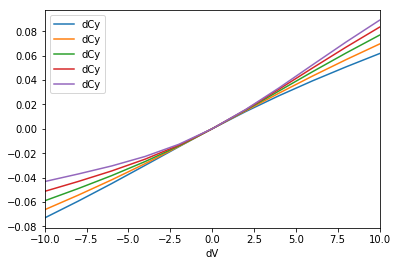

In [10]:
#Plot graph dCy = f(dV) for different AoA
#request data
df_1 = df.query('Layout == 1 & Wing == 1 & Span == 0.25')
df_1_m4 = df_1.query('AoA == -4')
df_1_0 = df_1.query('AoA == 0')
df_1_4 = df_1.query('AoA == 4')
df_1_8 = df_1.query('AoA == 8')
df_1_12 = df_1.query('AoA == 12')
#define plot
ax = plt.gca()
df_1_m4.plot(x = 'dV', y = 'dCy', ax = ax)
df_1_0.plot(x = 'dV', y = 'dCy', ax = ax)
df_1_4.plot(x = 'dV', y = 'dCy', ax = ax)
df_1_8.plot(x = 'dV', y = 'dCy', ax = ax)
df_1_12.plot(x = 'dV', y = 'dCy', ax = ax)
plt.show()

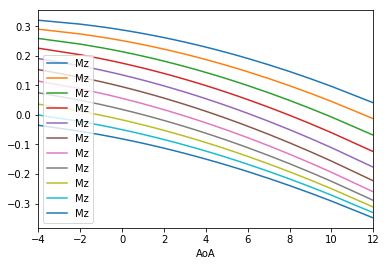

In [12]:
#Plot graph Mz = f(AoA, dV)
#request data
df_2 = df.query('Layout == 1 & Wing == 1 & Span == 0.25')
df_2_10 = df_2.query('dV == 10')
df_2_8  = df_2.query('dV == 8')
df_2_6  = df_2.query('dV == 6')
df_2_4  = df_2.query('dV == 4')
df_2_2 =  df_2.query('dV == 2')
df_2_0 =  df_2.query('dV == 0')
df_2_m2 = df_2.query('dV == -2')
df_2_m4 = df_2.query('dV == -4')
df_2_m6 = df_2.query('dV == -6')
df_2_m8 = df_2.query('dV == -8')
df_2_m10 = df_2.query('dV == -10')
#define plot
ax = plt.gca()
df_2_10.plot(x = 'AoA', y = 'Mz', ax = ax)
df_2_8.plot(x = 'AoA', y = 'Mz', ax = ax)
df_2_6.plot(x = 'AoA', y = 'Mz', ax = ax)
df_2_4.plot(x = 'AoA', y = 'Mz', ax = ax)
df_2_2.plot(x = 'AoA', y = 'Mz', ax = ax)
df_2_0.plot(x = 'AoA', y = 'Mz', ax = ax)
df_2_m2.plot(x = 'AoA', y = 'Mz', ax = ax)
df_2_m4.plot(x = 'AoA', y = 'Mz', ax = ax)
df_2_m6.plot(x = 'AoA', y = 'Mz', ax = ax)
df_2_m8.plot(x = 'AoA', y = 'Mz', ax = ax)
df_2_m10.plot(x = 'AoA', y = 'Mz', ax = ax)
plt.show()

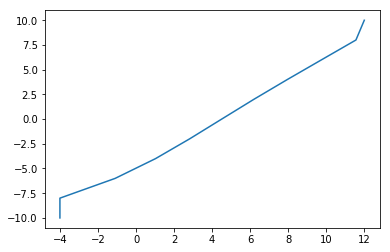

In [14]:
#Plot dV = f(AoA) for zero Mz condition with using linear interpolation from NumPy library
df_3 = df.query('Layout == 1 & Wing == 1 & Span == 0.25')
#Prepare array for store data
deflection = np.arange(-10,12,2)
AoA_bal_1  = np.zeros_like(deflection, dtype = float)
Cx_bal_1   = np.zeros_like(deflection, dtype = float)
Cy_bal_1   = np.zeros_like(deflection, dtype = float)

for i in np.ndenumerate(deflection):
    #Request data for current deflection angle
    dV_1 = df_3.loc[(df_3['dV'] == i[1])]
    #Get data for interpolation as NumPy array and flip it for increasing AoA order
    AoA_1 = np.flip(dV_1.iloc[:]['AoA'].values,0)
    Mz_1  = np.flip(dV_1.iloc[:]['Mz'].values,0)
    Cx_1  = np.flip(dV_1.iloc[:]['Cx'].values,0)
    Cy_1  = np.flip(dV_1.iloc[:]['Cy'].values,0)
    #Find AoA with zero Mz and current dV value
    AoA_bal_1[i[0]] = np.interp(0, np.flip(Mz_1,0), np.flip(AoA_1, 0))
    #Obtain Cx and Cy in this point
    Cx_bal_1[i[0]] = np.interp(AoA_bal_1[i[0]],AoA_1,Cx_1)
    Cy_bal_1[i[0]] = np.interp(AoA_bal_1[i[0]],AoA_1,Cy_1)

plt.plot(AoA_bal_1,deflection)
plt.show()

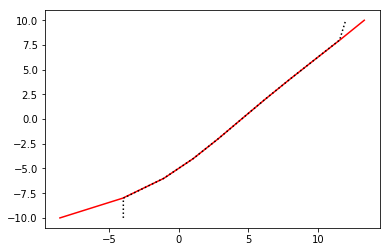

In [18]:
#Plot dV = f(AoA) for zero Mz condition with using quadratic interpolation from SciPy library
df_4 = df.query('Layout == 1 & Wing == 1 & Span == 0.25')
#Prepare array for store data
deflection = np.arange(-10,12,2)
AoA_bal_2  = np.zeros_like(deflection, dtype = float)
Cx_bal_2   = np.zeros_like(deflection, dtype = float)
Cy_bal_2   = np.zeros_like(deflection, dtype = float)

for i in np.ndenumerate(deflection):
    #Request data for current deflection angle
    dV_2 = df_4.loc[(df_4['dV'] == i[1])]
    #Get data for interpolation as NumPy array and flip it for increasing AoA order
    AoA_2 = np.flip(dV_2.iloc[:]['AoA'].values,0)
    Mz_2  = np.flip(dV_2.iloc[:]['Mz'].values,0)
    Cx_2  = np.flip(dV_2.iloc[:]['Cx'].values,0)
    Cy_2  = np.flip(dV_2.iloc[:]['Cy'].values,0)
    #Find AoA with zero Mz and current dV value
    AoA_bal_2[i[0]] = sp.interpolate.interp1d(np.flip(Mz_2,0), np.flip(AoA_2, 0), kind = 'quadratic',
                                             bounds_error = False, fill_value = 'extrapolate')(0)
    #Obtain Cx and Cy in this point
    Cx_bal_2[i[0]] = sp.interpolate.interp1d(AoA_2,Cx_2, kind = 'quadratic',
                                            bounds_error = False, fill_value = 'extrapolate')(AoA_bal_2[i[0]])
    Cy_bal_2[i[0]] = sp.interpolate.interp1d(AoA_2,Cy_2, kind = 'quadratic',
                                            bounds_error = False, fill_value = 'extrapolate')(AoA_bal_2[i[0]])

plt.plot(AoA_bal_2,deflection,'r')
plt.plot(AoA_bal_1,deflection,':k')
plt.show()

[-1183.71593474  -423.24349602  -136.39134718   -31.57343077
    -1.48953088     3.41314376     6.49132432     9.00077707
    11.18788971    13.09960997    14.6949979 ]


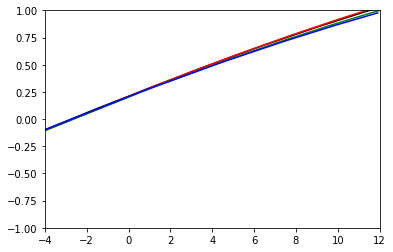

In [29]:
#Function, that return AoA, Cx, Cy for selected configuration (Layout, wing, span)
#with using quadratic interpolation (extrapolation) from SciPy
def Balance(Layout, Wing, Span):
    #Request data
    df_5 = df.loc[(df['Layout']==Layout)&(df['Wing']==Wing)&(df['Span']==Span)]
    #Prepare NumPy arrays
    deflection = np.arange(-10,12,2)
    AoA_bal_3 = np.zeros_like(deflection, dtype = float)
    Cx_bal_3 = np.zeros_like(deflection, dtype = float)
    Cy_bal_3 = np.zeros_like(deflection, dtype = float)
    
    for i in np.ndenumerate(deflection):
        #Request data for current deflection angle
        dV_3 = df_5.loc[(df_5['dV']==i[1])]
        #Get data for interpolation as NumPy array and flip it for increasing AoA order
        AoA_3 = np.flip(dV_3.iloc[:]['AoA'].values,0)
        Mz_3  = np.flip(dV_3.iloc[:]['Mz'].values,0)
        Cx_3  = np.flip(dV_3.iloc[:]['Cx'].values,0)
        Cy_3  = np.flip(dV_3.iloc[:]['Cy'].values,0)
        #Find AoA with zero Mz and current dV value
        AoA_bal_3[i[0]] = sp.interpolate.interp1d(np.flip(Mz_3,0), np.flip(AoA_3, 0), kind = 'quadratic',
                                                 bounds_error = False, fill_value = 'extrapolate')(0)
        #Obtain Cx and Cy in this point
        Cx_bal_3[i[0]] = sp.interpolate.interp1d(AoA_3,Cx_3, kind = 'quadratic',
                                                bounds_error = False, fill_value = 'extrapolate')(AoA_bal_3[i[0]])
        Cy_bal_3[i[0]] = sp.interpolate.interp1d(AoA_3,Cy_3, kind = 'quadratic',
                                                bounds_error = False, fill_value = 'extrapolate')(AoA_bal_3[i[0]])
    return AoA_bal_3, Cx_bal_3, Cy_bal_3

#Get some data for 4 different layout
deflection = np.arange(-10,12,2)

AoA_bal_a, Cx_bal_a, Cy_bal_a = Balance(5,1,0.50)
AoA_bal_b, Cx_bal_b, Cy_bal_b = Balance(6,1,0.50)
AoA_bal_c, Cx_bal_c, Cy_bal_c = Balance(7,1,0.50)
AoA_bal_d, Cx_bal_d, Cy_bal_d = Balance(8,1,0.50)

#plot it!
plt.plot(AoA_bal_a,Cy_bal_a, color = 'k')
plt.plot(AoA_bal_b,Cy_bal_b, color = 'r')
plt.plot(AoA_bal_c,Cy_bal_c, color = 'g')
plt.plot(AoA_bal_d,Cy_bal_d, color = 'b')
ax = plt.gca()
ax.set_xlim(-4,12)
ax.set_ylim(-1,1)
plt.show()


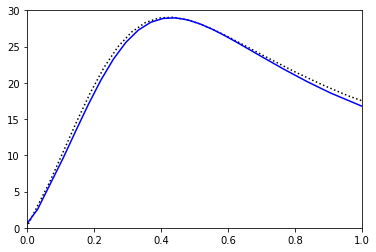

In [49]:
#Function, that return AoA, Cx, Cy for zero deflection
def ZeroDefl(Layout, Wing, Span):
    df_6 = df.loc[(df['Layout']==Layout)&(df['Wing']==Wing)&(df['Span']==Span)&(df['dV']==0)]
    AoA_6 = np.flip(df_6.iloc[:]['AoA'].values,0)
    Cx_6 = np.flip(df_6.iloc[:]['Cx'].values,0)
    Cy_6 = np.flip(df_6.iloc[:]['Cy'].values,0)
    return AoA_6, Cx_6, Cy_6

#Function, that return Cx, Cy with zero Mz and same AoA as previous
def ZeroPitch(Layout,Wing,Span):
    AoA_bal, Cx_bal, Cy_bal = Balance(Layout, Wing, Span)
    df_7 = df.loc[(df['Layout']==Layout)&(df['Wing']==Wing)&(df['Span']==Span)&(df['dV']==0)]
    AoA_7 = np.flip(df_7.iloc[:]['AoA'].values,0)
    Cx_7 = sp.interpolate.interp1d(AoA_bal, Cx_bal, kind = 'quadratic', bounds_error = False,
                                  fill_value = 'extrapolate')(AoA_7)
    Cy_7 = sp.interpolate.interp1d(AoA_bal, Cy_bal, kind = 'quadratic', bounds_error = False,
                                  fill_value = 'extrapolate')(AoA_7)
    return AoA_7, Cx_7, Cy_7

#Get data and calculate lift-to-drag ratio
AoA_0, Cx_0, Cy_0 = ZeroDefl(1,1,0.25)
AoA_b, Cx_b, Cy_b = ZeroPitch(1,1,0.25)
K_0 = Cy_0/Cx_0
K_b = Cy_b/Cx_b

#plot
plt.plot(Cy_0, K_0, ':k')
plt.plot(Cy_b, K_b, 'b')
ax = plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(0,30)
plt.show()


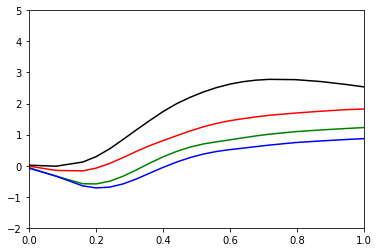

In [78]:
#Function that return Cx at same Cy for zero pitching moment condition
def ZeroPitchCy(Layout,Wing,Span):
    AoA_bal, Cx_bal, Cy_bal = Balance(Layout, Wing, Span)
    df_8 = df.loc[(df['Layout']==Layout)&(df['Wing']==Wing)&(df['Span']==Span)&(df['dV']==0)]
    Cy_8 = np.flip(df_8.iloc[:]['Cy'].values,0)
    Cx_8 = sp.interpolate.interp1d(Cy_bal, Cx_bal, kind = 'quadratic', bounds_error = False,
                                  fill_value = 'extrapolate')(Cy_8)
    return Cx_8, Cy_8

#function, that calculate trim-losses of Lift-to-Drag ratio
def TrimLosses(Layout, Wing, Span):
    AoA_0, Cx_0, Cy_0 = ZeroDefl(Layout, Wing, Span)
    Cx_b, Cy_b = ZeroPitchCy(Layout, Wing, Span)
    K_0 = Cy_0/Cx_0
    K_b = Cy_b/Cx_b
    delta_K = K_0 - K_b
    return Cy_0, delta_K

#plot, different elevator span, same layout
Cy_a, dK_a = TrimLosses(8,1,0.25)
Cy_b, dK_b = TrimLosses(8,1,0.50)
Cy_c, dK_c = TrimLosses(8,1,0.75)
Cy_d, dK_d = TrimLosses(8,1,0.90)

plt.plot(Cy_a, dK_a, 'k')
plt.plot(Cy_b, dK_b, 'r')
plt.plot(Cy_c, dK_c, 'g')
plt.plot(Cy_d, dK_d, 'b')
ax = plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(-2,5)
plt.show()


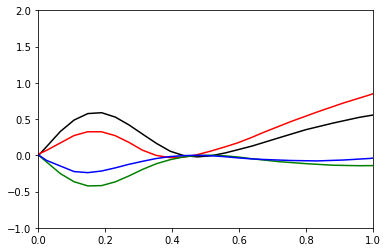

In [69]:
#plot, same span, different wing vertical position and elevator position
Cy_e, dK_e = TrimLosses(1,1,0.50)
Cy_f, dK_f = TrimLosses(5,1,0.50)
Cy_g, dK_g = TrimLosses(1,0,0.50)
Cy_h, dK_h = TrimLosses(5,0,0.50)

plt.plot(Cy_e, dK_e, 'k')
plt.plot(Cy_f, dK_f, 'r')
plt.plot(Cy_g, dK_g, 'g')
plt.plot(Cy_h, dK_h, 'b')
ax = plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(-1,2)
plt.show()
